In [145]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
import numpy as np
import matplotlib.pyplot as plt

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
train_dir = '/content/drive/MyDrive/Machine_Learning/Group_Project_Data/Train'
valid_dir = '/content/drive/MyDrive/Machine_Learning/Group_Project_Data/Valid'

In [148]:
img_size = (64, 64)
batch_size = 32
epochs = 5

In [149]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=90,
    shear_range = 0.4
)

In [150]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [151]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary'
)

valid_set = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary'
)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [152]:
train_label = train_set.labels
valid_label = valid_set.labels

In [153]:
train_count = [np.count_nonzero(train_label == 0), 
               np.count_nonzero(train_label == 1)]
valid_count = [np.count_nonzero(valid_label == 0), 
               np.count_nonzero(valid_label == 1)]
classes = ['Fake', 'Real']

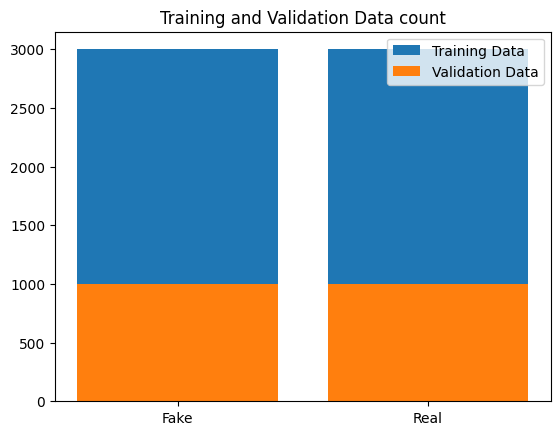

In [154]:
plt.figure()
plt.bar(classes,train_count, label = 'Training Data')
plt.bar(classes, valid_count, label = 'Validation Data')
plt.title('Training and Validation Data count')
plt.legend()
plt.savefig('/content/drive/MyDrive/Count.png')
plt.show()

In [155]:
batch = train_set.next()

In [156]:
real_ind = [n for n in range(len(batch[1])) if batch[1][n] == 1]
fake_ind = [n for n in range(len(batch[1])) if batch[1][n] == 0]

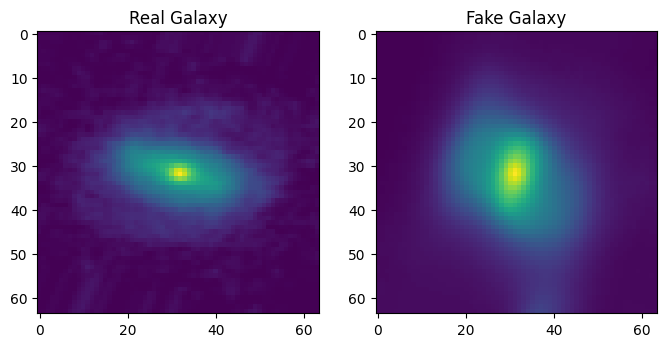

In [157]:
fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize = (8,8))
ax[0].imshow(batch[0][real_ind[0]])
ax[0].set_title('Real Galaxy')
ax[1].imshow(batch[0][fake_ind[0]])
ax[1].set_title('Fake Galaxy')
plt.savefig('/content/drive/MyDrive/images.png')
plt.show()

In [158]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64,1),
                  padding='same',kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu',
                  padding='same',kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',
                  padding='same',kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu',
                  padding='same',kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid')
])

In [159]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 64, 64, 16)        160       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 8, 8, 64)        

In [160]:
model.compile(loss= 'binary_crossentropy', 
              optimizer= optimizers.Adam(learning_rate=0.001), 
              metrics= ['accuracy'])

In [161]:
Early_Stop = callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_set,
    epochs=5,
    validation_data=valid_set,
    callbacks = [Early_Stop]
)

Epoch 1/6
188/188 [==============================] - 21s 90ms/step - loss: 0.2685 - accuracy: 0.9002 - val_loss: 0.0704 - val_accuracy: 0.9975
Epoch 2/6
188/188 [==============================] - 16s 87ms/step - loss: 0.0645 - accuracy: 0.9975 - val_loss: 0.0552 - val_accuracy: 0.9980
Epoch 3/6
188/188 [==============================] - 16s 86ms/step - loss: 0.0462 - accuracy: 0.9980 - val_loss: 0.0357 - val_accuracy: 0.9995
Epoch 4/6
188/188 [==============================] - 16s 85ms/step - loss: 0.0515 - accuracy: 0.9937 - val_loss: 0.0409 - val_accuracy: 0.9985
Epoch 5/6
188/188 [==============================] - 18s 94ms/step - loss: 0.0395 - accuracy: 0.9975 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 6/6
188/188 [==============================] - 16s 84ms/step - loss: 0.0258 - accuracy: 0.9995 - val_loss: 0.0416 - val_accuracy: 0.9950


In [162]:
model.save("/content/Group_30_Model_Trained")

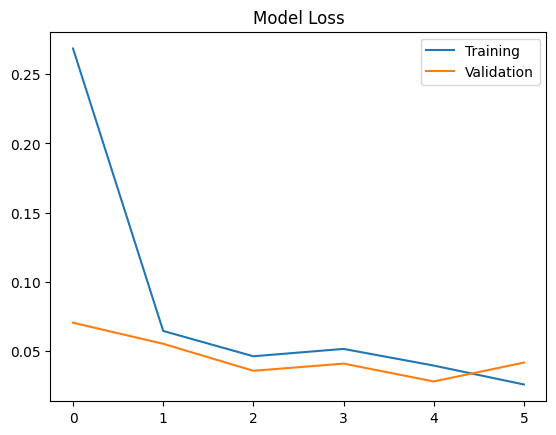

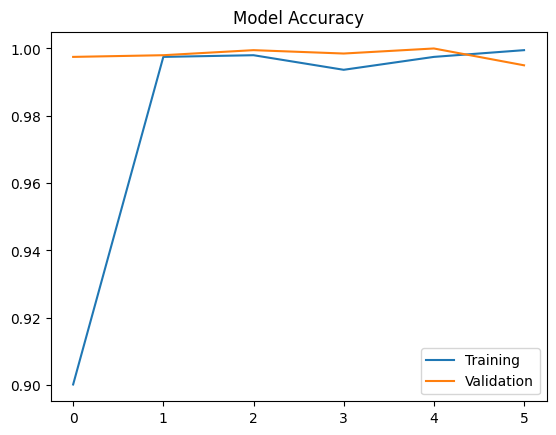

In [163]:
plt.figure()
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.title('Model Loss')
plt.savefig('/content/drive/MyDrive/Modelloss.png')
plt.figure()
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.title('Model Accuracy')
plt.savefig('/content/drive/MyDrive/ModelAccuracy.png')
plt.show()

In [164]:
test_loss, test_acc = model.evaluate(valid_set)

63/63 [==============================] - 3s 47ms/step - loss: 0.0416 - accuracy: 0.9950


In [165]:
test_loss

0.04164223372936249

In [166]:
test_acc

0.9950000047683716

In [167]:
pred = model.predict(valid_set)

63/63 [==============================] - 3s 53ms/step


In [168]:
p = [1 * (x[0]>=0.5) for x in pred]

In [169]:
valid_labels = valid_set.labels

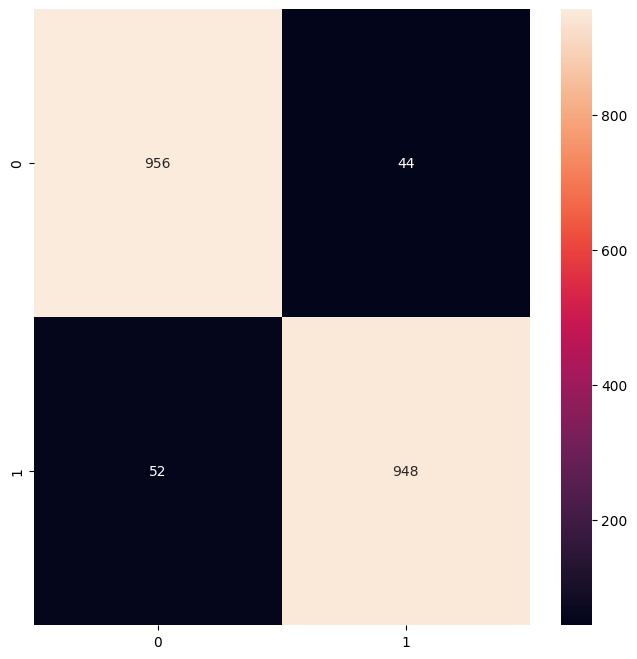

In [177]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
data = confusion_matrix(valid_labels, p)
plt.figure(figsize=(8,8))
ax = sns.heatmap(data, annot=True, fmt='d')
plt.savefig('/content/drive/MyDrive/confusion.png')

In [178]:
from sklearn.metrics import classification_report
report = classification_report(valid_labels, p)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1000
           1       0.96      0.95      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

